In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('datasets/Credit_Card_Applications.csv')
dataset

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,15808223,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,15769980,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,15675450,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,15776494,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


In [3]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [4]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(0,1))
X = sc.fit_transform(X)

In [5]:
from minisom import MiniSom

som = MiniSom(x=10, y=10, input_len=15, sigma=1, learning_rate=0.5)
som.random_weights_init(X)
som.train_random(data=X, num_iteration=100)

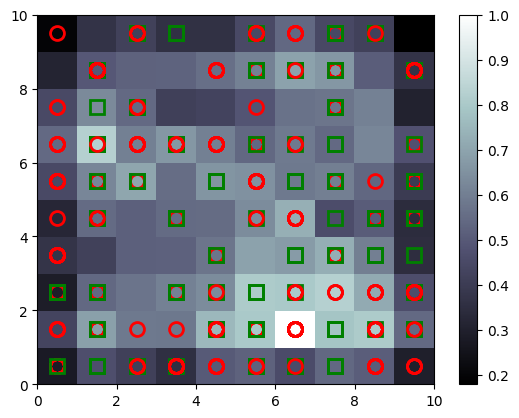

In [6]:
from pylab import bone, pcolor, colorbar, plot, show

bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o','s']
colors = ['r','g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10, 
         markeredgewidth = 2)
    
show()

In [9]:
mappings = som.win_map(X)

In [10]:
frauds = np.concatenate((mappings[(6,1)], mappings[(2,6)]), axis = 0)
frauds = sc.inverse_transform(frauds)

In [11]:
frauds

array([[1.5662854e+07, 0.0000000e+00, 2.9580000e+01, 1.7500000e+00,
        1.0000000e+00, 4.0000000e+00, 4.0000000e+00, 1.2500000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        2.0000000e+00, 2.8000000e+02, 1.0000000e+00],
       [1.5745375e+07, 0.0000000e+00, 3.3080000e+01, 1.6250000e+00,
        2.0000000e+00, 2.0000000e+00, 4.0000000e+00, 5.4000000e-01,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        2.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       [1.5638983e+07, 0.0000000e+00, 5.6830000e+01, 4.2500000e+00,
        1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 5.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        2.0000000e+00, 0.0000000e+00, 5.0000000e+00],
       [1.5654625e+07, 0.0000000e+00, 5.3330000e+01, 1.6500000e-01,
        2.0000000e+00, 1.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        1.0000000e+00,